#### Datasets

In [1]:
import tensorflow as tf
from tensorflow import keras as kr

In [2]:
print(tf.__version__)
print(kr.__version__)

2.1.0
2.2.4-tf


In [3]:
kr.datasets?

Type:        module
String form: <module 'tensorflow_core.python.keras.api._v2.keras.datasets' from 'C:\\src\\python\\envs\\ml\\tensorflow\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\datasets\\__init__.py'>
File:        c:\src\python\envs\ml\tensorflow\lib\site-packages\tensorflow_core\python\keras\api\_v2\keras\datasets\__init__.py
Docstring:   Public API for tf.keras.datasets namespace.


In [4]:
kr.datasets.mnist.load_data?

Signature: kr.datasets.mnist.load_data(path='mnist.npz')
Docstring:
Loads the MNIST dataset.

Arguments:
    path: path where to cache the dataset locally
        (relative to ~/.keras/datasets).

Returns:
    Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.

License:
    Yann LeCun and Corinna Cortes hold the copyright of MNIST dataset,
    which is a derivative work from original NIST datasets.
    MNIST dataset is made available under the terms of the
    [Creative Commons Attribution-Share Alike 3.0 license.](
    https://creativecommons.org/licenses/by-sa/3.0/)
File:      c:\src\python\envs\ml\tensorflow\lib\site-packages\tensorflow_core\python\keras\datasets\mnist.py
Type:      function


In [5]:
(x_train, y_train), (x_test, y_test) = kr.datasets.mnist.load_data()

11493376/11490434 [==============================] - 13s 1us/step


In [50]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


#### Plotting through numpy

In [10]:
import numpy as np

In [12]:
np.set_printoptions?

Signature:
np.set_printoptions(
    precision=None,
    threshold=None,
    edgeitems=None,
    linewidth=None,
    suppress=None,
    nanstr=None,
    infstr=None,
    formatter=None,
    sign=None,
    floatmode=None,
    **kwarg,
)
Docstring:
Set printing options.

These options determine the way floating point numbers, arrays and
other NumPy objects are displayed.

Parameters
----------
precision : int or None, optional
    Number of digits of precision for floating point output (default 8).
    May be None if `floatmode` is not `fixed`, to print as many digits as
    necessary to uniquely specify the value.
threshold : int, optional
    Total number of array elements which trigger summarization
    rather than full repr (default 1000).
    To always use the full repr without summarization, pass `sys.maxsize`.
edgeitems : int, optional
    Number of array items in summary at beginning and end of
    each dimension (default 3).
linewidth : int, optional
    The number of characters 

In [32]:
np.set_printoptions( linewidth = 115 ) # you can see the numbers as it is
print(x_train[0])
print(y_train[0])
print(x_test[0])
print(y_test[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

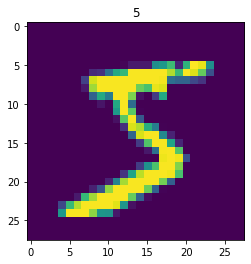

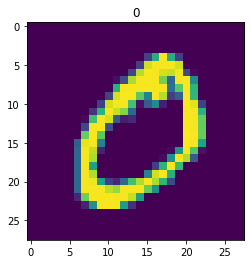

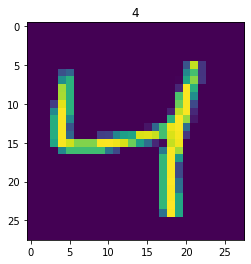

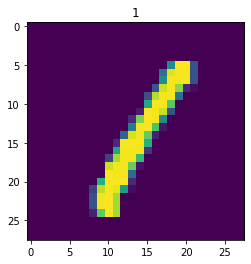

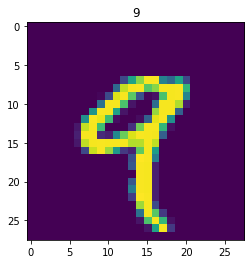

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(5):
    plt.figure( clear=True )
    plt.imshow( x_train[i] )
    plt.title( y_train[i] )

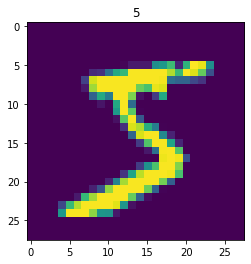

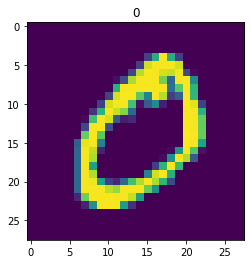

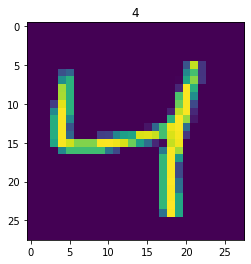

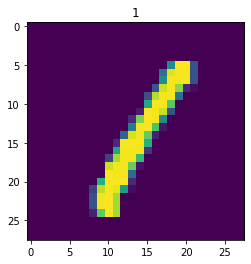

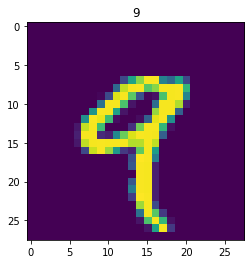

In [41]:
# standardize
x_train = x_train / 255.0
x_test = x_test / 255.0


for i in range(5):
    plt.figure( clear=True )
    plt.imshow( x_train[i] )
    plt.title( y_train[i] )

### Model

In [44]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , Flatten

In [ ]:
Sequential?

In [ ]:
Dense?

In [ ]:
Flatten?

In [ ]:
Sequential.add?

In [ ]:
Sequential.summary?

In [51]:
Sequential.compile?

Signature:
Sequential.compile(
    self,
    optimizer='rmsprop',
    loss=None,
    metrics=None,
    loss_weights=None,
    sample_weight_mode=None,
    weighted_metrics=None,
    target_tensors=None,
    distribute=None,
    **kwargs,
)
Docstring:
Configures the model for training.

Arguments:
    optimizer: String (name of optimizer) or optimizer instance.
        See `tf.keras.optimizers`.
    loss: String (name of objective function), objective function or
        `tf.keras.losses.Loss` instance. See `tf.keras.losses`. An objective
        function is any callable with the signature
        `scalar_loss = fn(y_true, y_pred)`. If the model has multiple
        outputs, you can use a different loss on each output by passing a
        dictionary or a list of losses. The loss value that will be
        minimized by the model will then be the sum of all individual
        losses.
    metrics: List of metrics to be evaluated by the model during training
        and testing. Typically y

In [ ]:
Sequential.fit?

Object `Sequential.history` not found.


In [49]:
model = Sequential()

model.add( Flatten( input_shape=( 28 , 28 ) ) ) # makes a 2D image as 1D
model.add( Dense( units = 256 , activation = "sigmoid" ) )
model.add( Dense( units = 10 ,activation = "softmax" ) )
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


### ReLU
   #### Faster ( sign bit lookup )
### Sigmoid
   #### Slower ( exponential Calculation )
### Softmax
   #### Converts multi clss distribution to probability
   #### 1 , 2 , 2 => 0.2 , 0.4 , 0.4

# ------------------------------------------------------------------

### Regularization 
Weights adjust to make sure the outputs doesnt reach int limit

In [53]:
tf.losses? # look into all the losses

Type:        module
String form: <module 'tensorflow_core.python.keras.api._v2.keras.losses' from 'C:\\src\\python\\envs\\ml\\tensorflow\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\losses\\__init__.py'>
File:        c:\src\python\envs\ml\tensorflow\lib\site-packages\tensorflow_core\python\keras\api\_v2\keras\losses\__init__.py
Docstring:   Built-in loss functions.


In [54]:
tf.optimizers? # look into all optimizers

Type:        module
String form: <module 'tensorflow_core.python.keras.api._v2.keras.optimizers' from 'C:\\src\\python\\envs\\ml\\ <...> w\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\optimizers\\__init__.py'>
File:        c:\src\python\envs\ml\tensorflow\lib\site-packages\tensorflow_core\python\keras\api\_v2\keras\optimizers\__init__.py
Docstring:   Built-in optimizer classes.


In [55]:
tf.metrics?

Type:        module
String form: <module 'tensorflow_core.python.keras.api._v2.keras.metrics' from 'C:\\src\\python\\envs\\ml\\tensorflow\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\metrics\\__init__.py'>
File:        c:\src\python\envs\ml\tensorflow\lib\site-packages\tensorflow_core\python\keras\api\_v2\keras\metrics\__init__.py
Docstring:   Built-in metrics.


In [73]:
model.compile(  optimizer = tf.optimizers.Adam() ,
                loss = tf.losses.SparseCategoricalCrossentropy(),
                metrics = [ 'accuracy' ] #list of params  
             )

In [74]:
%%time
model.fit(
    x_train , y_train ,
    epochs = 20,
    validation_data = ( x_test , y_test )
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2710 - accuracy: 0.9223 - val_loss: 0.2750 - val_accuracy: 0.9220
Epoch 2/20
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2704 - accuracy: 0.9227 - val_loss: 0.2698 - val_accuracy: 0.9235
Epoch 3/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2696 - accuracy: 0.9226 - val_loss: 0.2671 - val_accuracy: 0.9235
Epoch 4/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2684 - accuracy: 0.9238 - val_loss: 0.2707 - val_accuracy: 0.9218
Epoch 5/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2671 - accuracy: 0.9233 - val_loss: 0.2750 - val_accuracy: 0.9208
Epoch 6/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2675 - accuracy: 0.9234 - val_loss: 0.2664 - val_accuracy: 0.9245
Epoch 7/20
60000/60000 [==============================] 

In [80]:
model.history?
# this object gets added once the execution completes

Type:        History
String form: <tensorflow.python.keras.callbacks.History object at 0x000001F08D850B08>
File:        c:\src\python\envs\ml\tensorflow\lib\site-packages\tensorflow_core\python\keras\callbacks.py
Docstring:  
Callback that records events into a `History` object.

This callback is automatically applied to
every Keras model. The `History` object
gets returned by the `fit` method of models.


In [79]:
model.history.history?

Type:        dict
String form: {'loss': [0.27095299552877744, 0.270437811550498, 0.2695891288985809, 0.26836027313868205, 0.2671 <...>  0.9205, 0.9201, 0.9227, 0.9242, 0.9242, 0.9249, 0.9242, 0.9256, 0.9252, 0.9245, 0.9264, 0.9247]}
Length:      4
Docstring:  
dict() -> new empty dictionary
dict(mapping) -> new dictionary initialized from a mapping object's
    (key, value) pairs
dict(iterable) -> new dictionary initialized as if via:
    d = {}
    for k, v in iterable:
        d[k] = v
dict(**kwargs) -> new dictionary initialized with the name=value pairs
    in the keyword argument list.  For example:  dict(one=1, two=2)


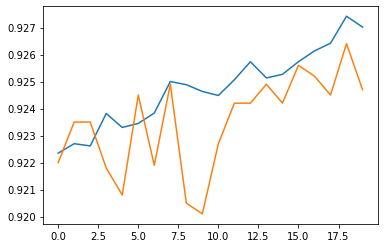

In [81]:
h = model.history.history

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])

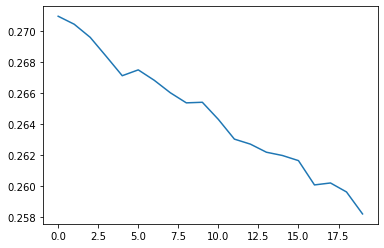

In [82]:
plt.plot(h['loss'])

# try out more layers and diff functions and make it work